# **Basic and more simple version of the PINN**

**Step 1**: Import Libraries and Define Neural Network
Start by importing the necessary libraries and defining the neural network that will predict the forces
𝐹
1 (
F
1
)
​
  and
𝐹
2
(
F
2
)
​
 .

In [1]:
# Step 1: Import libraries and define the neural network
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the Neural Network for Newton's Third Law
class NewtonThirdLawPINN(tf.keras.Model):
    def __init__(self):
        super(NewtonThirdLawPINN, self).__init__()
        self.dense1 = tf.keras.layers.Dense(20, activation='tanh')
        self.dense2 = tf.keras.layers.Dense(20, activation='tanh')
        self.output_layer = tf.keras.layers.Dense(2)  # Outputs two forces: F1 and F2

    def call(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        return self.output_layer(x)  # Output: [F1, F2]

# Instantiate the model
model = NewtonThirdLawPINN()

print("Neural Network defined and ready for training!")


Neural Network defined and ready for training!


**Step 2**: Generate Synthetic Data (Time Steps)

Next, let’s generate some synthetic time data to serve as inputs for the neural network. We'll use 100 time steps between 0 and 10.

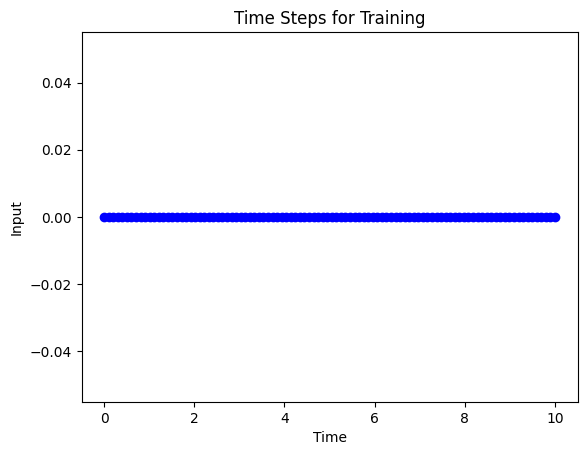

In [2]:
# Step 2: Generate synthetic data (time steps)
time_steps = np.linspace(0, 10, 100).reshape(-1, 1)  # Time or position as input
inputs = tf.convert_to_tensor(time_steps, dtype=tf.float32)

# Visualize time steps
plt.plot(time_steps, np.zeros_like(time_steps), 'bo', label='Time Steps')
plt.title('Time Steps for Training')
plt.xlabel('Time')
plt.ylabel('Input')
plt.show()


**Step 3**: Initialize and Visualize Predictions Before Training

Before training, let’s make predictions with the untrained model and visualize
𝐹
1 (
F
1
)
​
 ,
𝐹
2
(
F
2
)
​
 , and
𝐹
1
+
𝐹
2
(
F
1
​
 +F
2
)
​
 . We expect random outputs at this stage.

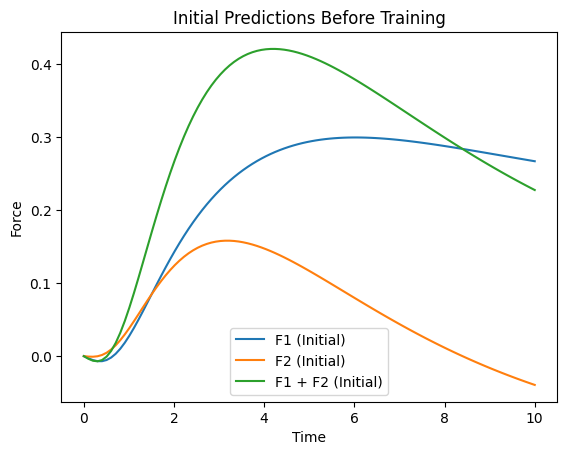

As expected, the forces do not satisfy Newton's Third Law yet!


In [3]:
# Step 3: Visualize model predictions before training
predicted_forces = model(inputs)
F1_pred, F2_pred = predicted_forces[:, 0], predicted_forces[:, 1]

# Visualize initial predictions
plt.plot(time_steps, F1_pred, label='F1 (Initial)')
plt.plot(time_steps, F2_pred, label='F2 (Initial)')
plt.plot(time_steps, F1_pred + F2_pred, label='F1 + F2 (Initial)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Force')
plt.title('Initial Predictions Before Training')
plt.show()

print("As expected, the forces do not satisfy Newton's Third Law yet!")


**Step 4**: Define Physics-Informed Loss Function

Now let’s define the physics-informed loss function that penalizes the neural network when it violates
𝐹
1
+
𝐹
2
=
0
(
F
1
​
 +F
2
) = 0.

In [4]:
# Step 4: Define the Physics-Informed Loss Function
def pinn_loss(model, inputs):
    forces = model(inputs)
    F1 = forces[:, 0]  # Force on the first object
    F2 = forces[:, 1]  # Force on the second object

    # Physics-informed loss enforcing Newton's third law: F1 + F2 = 0
    physics_loss = tf.reduce_mean(tf.square(F1 + F2))
    return physics_loss

print("Physics-informed loss function defined!")


Physics-informed loss function defined!


**Step 5**: Define a Single Training Step

We will now define a training step that calculates the loss, computes gradients, and updates the model’s weights using an optimizer.

In [5]:
# Step 5: Define the training step
def train_step(model, inputs, optimizer):
    with tf.GradientTape() as tape:
        loss = pinn_loss(model, inputs)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# Instantiate an optimizer
optimizer = tf.keras.optimizers.Adam()

print("Training step defined, ready for training!")


Training step defined, ready for training!


**Step 6**: Train and Visualize Progress

We will train the model step-by-step and visualize how the predictions evolve after 0, 100, 500, and 1000 epochs.

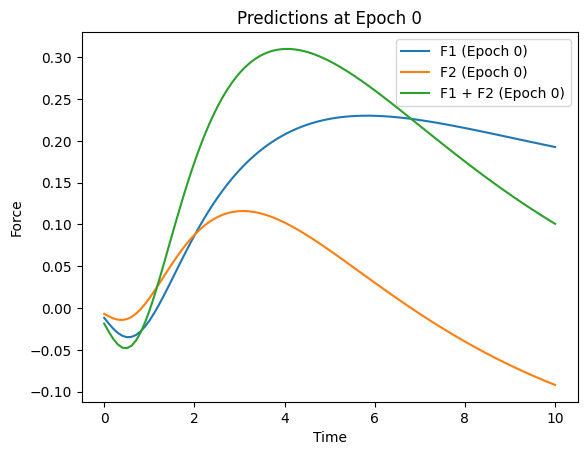

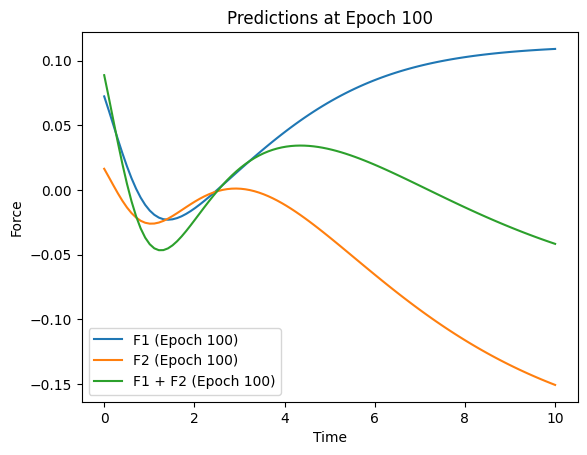

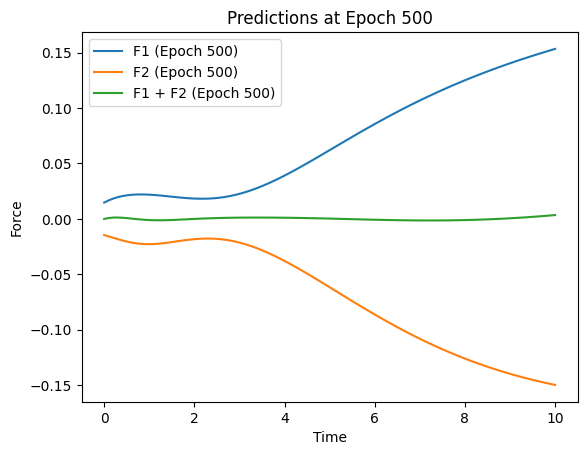

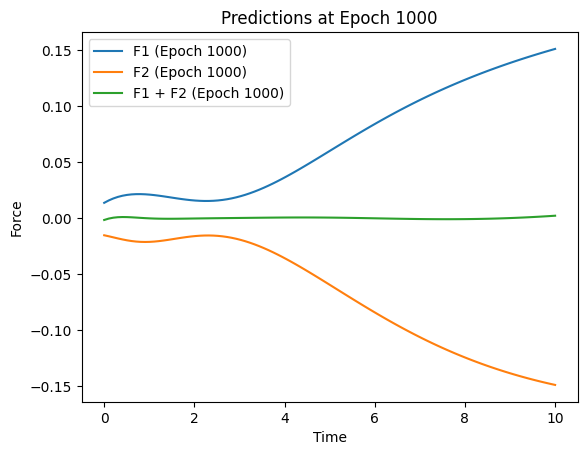

Loss at Epoch 0: 0.10062796622514725
Loss at Epoch 100: 0.000856146914884448
Loss at Epoch 500: 1.240962888005015e-06
Loss at Epoch 1000: 4.468091958642617e-07


In [6]:
# Step 6: Train and visualize after each set of epochs
epochs_list = [0, 100, 500, 1000]  # We will visualize at these epochs
losses = []

for epoch in range(epochs_list[-1] + 1):
    loss = train_step(model, inputs, optimizer)
    if epoch in epochs_list:
        losses.append(loss.numpy())

        # Make predictions at current epoch
        predicted_forces = model(inputs)
        F1_pred, F2_pred = predicted_forces[:, 0], predicted_forces[:, 1]

        # Plot the forces
        plt.plot(time_steps, F1_pred, label=f'F1 (Epoch {epoch})')
        plt.plot(time_steps, F2_pred, label=f'F2 (Epoch {epoch})')
        plt.plot(time_steps, F1_pred + F2_pred, label=f'F1 + F2 (Epoch {epoch})')
        plt.legend()
        plt.xlabel('Time')
        plt.ylabel('Force')
        plt.title(f'Predictions at Epoch {epoch}')
        plt.show()

# Print out the losses at each milestone epoch
for e, l in zip(epochs_list, losses):
    print(f"Loss at Epoch {e}: {l}")


**Step 7**: Visualize Final Results

Finally, after the complete training, we visualize the final predictions.

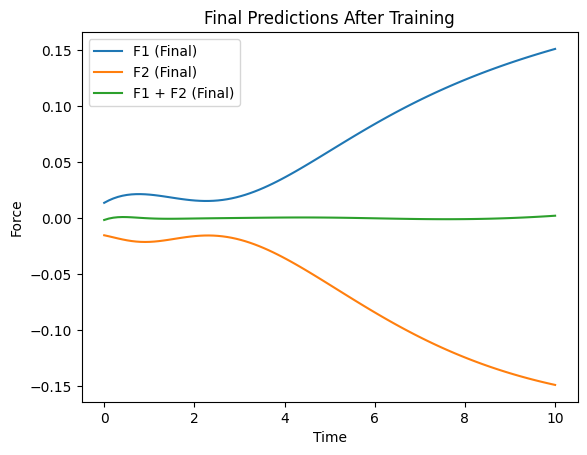

In [7]:
# Step 7: Visualize final results after full training
predicted_forces = model(inputs)
F1_pred, F2_pred = predicted_forces[:, 0], predicted_forces[:, 1]

plt.plot(time_steps, F1_pred, label='F1 (Final)')
plt.plot(time_steps, F2_pred, label='F2 (Final)')
plt.plot(time_steps, F1_pred + F2_pred, label='F1 + F2 (Final)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Force')
plt.title('Final Predictions After Training')
plt.show()


# **Step-by-Step Guide to Upgrading the Above Model**

In [9]:
# Define an improved PINN model with more layers
class ImprovedNewtonThirdLawPINN(tf.keras.Model):
    def __init__(self):
        super(ImprovedNewtonThirdLawPINN, self).__init__()
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')  # Increased units
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(64, activation='relu')
        self.output_layer = tf.keras.layers.Dense(2)  # Output F1 and F2

    def call(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.output_layer(x)  # Output two forces


# We increased the number of layers and neurons to allow the model to learn more complex relationships.

# The ReLU activation function was used instead of tanh for better performance in deeper networks.


**ReLU (Rectified Linear Unit):**

Range: Outputs values from 0 to positive infinity.
Advantages: Simple to compute and helps avoid the vanishing gradient problem, allowing for faster training.
Disadvantages: Can lead to "dying ReLU" issues, where some neurons may become inactive and stop learning.
Common Use: Frequently used in the hidden layers of deep neural networks.

**Sigmoid:**

Range: Outputs values between 0 and 1.
Advantages: Good for binary classification tasks, as it produces probability-like outputs.
Disadvantages: Can suffer from vanishing gradients, making training slower and harder in deep networks.
Common Use: Often used in the output layer for binary classification problems.

**Tanh (Hyperbolic Tangent):**

Range: Outputs values between -1 and 1.
Advantages: Zero-centered outputs can lead to faster convergence compared to Sigmoid.
Disadvantages: Also suffers from the vanishing gradient problem.
Common Use: Typically used in hidden layers, especially when input values are normalized.







In [11]:
# Let's set up the parameters for fine-tuning:

# Hyperparameters
initial_learning_rate = 1e-4  # Change the learning rate
decay_steps = 500  # Number of steps for decay
decay_rate = 0.95  # Decay rate for the learning rate
batch_size = 32  # Change batch size
num_epochs = 2000  # Increase number of epochs
regularization_weight = 1e-5  # Modify regularization weight


In [12]:
# Define the learning rate schedule with new hyperparameters
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=decay_steps,
    decay_rate=decay_rate
)

# Instantiate the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
